# 확률적 경사 하강법
* 확률적 경사 하강법에서 확률적이란 말은 무작위하게 혹은 랜덤하게의 기술적인 표현입니다. 
* 경사는 기울기를 의미합니다. 
* 하강법은 내려가는 방법입니다. 

어디서부터 내려올지 선택하기 때문에(랜덤으로 시작점을 뽑는다) 확률적이라고 한다

즉, 확률적으로 밑으로 내려오는 것 = 최소값을 찾기 위함 = 오차가 가장 적은 파라미터
(인자)를 찾기 위해서이다.

딥러닝에서는 일반 미분이 아닌, 편미분을 사용하여 기울기를 찾게된다.

산에서 내려온다고 가정하면, 등산로 입구까지 내려갈 때 가장 빠른 길은 경사가 가장 가파른 길이다.

= 경사가 가장 가파른 길을 구하기 위해 미분을 사용한다. = 경사 하강법의 개념


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

* 보폭 = 학습률(learning ~) 이 너무 크면 원하는 지점(최저점)을 지나갈 수 있다.

어떤 보폭이 가장 최적인지 알 수없고, 파라미터 조합을 다 돌려본 뒤 확인할 수 있다.

* 경사 하강법의 목적 = 훈련 데이터를 통해서 가장 가파른 길을 찾는다!!

손실함수의 오차 값이 가장 작아지는 방정식의 계수(가장 가파른 길)가 실제 모형을 가장 잘 표현한다.

* 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다.
이후, 다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다.


* 이런식으로, 전체 샘플을 모두 사용할 때까지 계속한다. 
이렇게 해서 답을 찾지 못하면 다시 처음부터 시작한다. (초기화 하는 것이 아니라 이어서 학습시킨다)


* 훈련 세트를 모두 사용하는 과정을 에포크(epoch)라고 한다.

에포크 = 몇 번 반복해야하는지 정해주어야한다.

ex) 문제집 한 권을 다 푸는 것 = 1에포크, 동일한 문제집을 한 번 더 풀면 2에포크

에포크가 많을수록 훈련이 잘 되는 것은 맞지만, 시간이 손해볼 수 있다.
데이터가 많으면 많을수록 시간이 많이 걸리기 때문에 !! 적절한 에포크 값을 정해야한다.

뿐만 아니라 에포크를 너무 늘리게되면 훈련 세트에 과대적합(overfitting) 될 수 있다!

---

1개의 데이터 셋을 사용하여 내려오는 것보다 여러개를 한 번에 묶어서 사용하면 시간이 더 절약된다.

이를 '미니배치 경사 하강법'이라고 하며, 숟가락을 가지고 밥을 먹는 것과 비슷하다.
미니배치 경사 하강법은 내부적으로 행렬이 사용된다. 데이터가 행렬로 묶여서 전달된다.

* 미니배치 경사 하강법을 많이 사용하며, 시간을 줄이기 위해 사용한다.

반대로 전체 샘플을 사용하는 경우 '배치 경사 하강법'이라고 하는데, 밥 한 공기를 한 입에 넣는 것과 비슷하다.(거의 사용하지 않음)

---

# 손실 함수 = 비용 함수

loss(cost) function = 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준이다

하이퍼 파라미터 ? ?

값은 작을수록 좋지만, 어떤 값이 최솟값인지는 알 수 없다. 최소값에 근접한 값을 찾아 사용해야한다.

어떤 손실함수를 사용할지는 우리가 직접 설정해야한다 ㅠㅠ ! 

* 손실함수에서 엔트로피 개념을 사용한다

실제값과 예측값을 비교하는데, 이 비교했을 때 정보량이 많다 ? = 오답이다
ex) 장동건과.. 교수님의 얼굴 ^^,, 나와 전지현의 얼굴 ^_^~

* cross-entropy 개념을 사용한다
1. 실제 정답과 예측값 사이에 할 말이 많다 = 예측 값이 오답일 확률이 높다.
2. 할 말이 별로 없다 = 예측 값이 정답에 매우 근접하다는 의미이다

장동건 포스터와 나를 비교했을 때, 할 말이 많이 없어지려면 성형 수술을 하는 것처럼,
손실 함수의 계수를 바꿔 오차 값이(정보량) 적어질 때 까지 계속해서 훈련시킨다 :)

---

# 로지스틱 손실 함수

## SGDClassifier

In [18]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [19]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

# https://bskyvision.com/849
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [22]:
# SGDClassifier = 확률적 경사 하강법의 줄임말
# 수식을 모르더라도 확률적 경사 하강법을 사용할 수 있으며, 분류를 할 예정이다.
from sklearn.linear_model import SGDClassifier

In [25]:
# warning 이유 = max_iter 값이 충분하지 않아서 생기는 가이드 라인이다.
# 경고를 없애기 위해서는 max_iter = 1000으로 변경하면 된다.
sc = SGDClassifier(loss='log', max_iter=1000, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


In [26]:
# 산에서 내려올 때, 새롭게 학습시키는 것이 아니라 훈련을 이어서 해주는 함수이다.
# partial_fit()을 통해 이어서 훈련시키면 성능이 좋아진다.

# 이 함수를 이용해서 훈련할 때마다 에포크가 1개씩 늘어난다(이어서 훈련!!)
sc.partial_fit(train_scaled, train_target)

# 분류이므로 accruracy?
# 과대적합, 과소적합 모두 해당하지 않는 것 같다.
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.925


## 에포크와 과대/과소적합

In [9]:
import numpy as np

# 확률적 경사 하강법 
# 손실함수 log ??
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [10]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [11]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

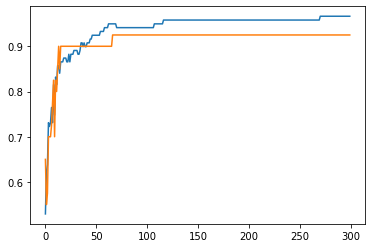

In [12]:
import matplotlib.pyplot as plt

plt.plot(train_score) # 파란색 = 훈련
plt.plot(test_score)  # 주황색 = 테스트
plt.show()
# 300번 에포크를 진행할 때, test 데이터 그래프를 봤을 때 변화가 없다.
# 즉, 약 75회 이후부터는 계속해서 훈련 할 필요가 없다.
# 훈련 데이터 결과(파란색이 점점 높아짐)가 올라가고 있는 것 = 과대적합의 가능성 증가

In [13]:
# tol = None이 무엇일까? 하다가 시간, 전기를 절약할 수 있게 해주는 조건인 듯 하다.
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [14]:
# lost function (손실 함수)의 종류가 다양하게 존재한다.
# 이번에는 힌지(hinge) 손실 함수를 사용한 경우이다. 
# 손실 함수를 바꾸면서 성능이 어떻게 변화하는지 볼 수 있다.
# 손실 함수를 모두 돌려보고 어떤 것이 가장 좋은지 판단할 수 있다
# 머신러닝 = 돌려보기 전에는 말 하지 말라 !
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


In [15]:
help(SGDClassifier)
# early_stopping - 시간과 전기를 절약하기 위함^_^

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

---